# Notebook activity B1.4 Choosing the number of clusters

Whilst working through Notebook activity B1.3, we carried out $k$-means clustering on the parking data. In that notebook activity, we just found the two-cluster solution. Whilst that was shown to be a reasonable clustering of the data and fits with what was suggested in Example 3 (Subsection 1.1, Unit B1), in this notebook activity we will explore solutions found using $k$-means clustering with a greater number of clusters. 

## (a) Getting started

### (i)

Start by running the following code.

In [ ]:
# Load the M348 package
library(M348)
# Load the parking data frame
data(parking)
# Check the data frame has loaded OK
head(parking)

### (ii)

Use the code cell below to repeat what you did in Notebook activity B1.3 to produce the histogram of `occupancy` and then obtain (and store as an object) the two-cluster solution produced by $k$-means clustering. 

#### Solution <a class="tocSkip">

The required code and resulting output are given below.

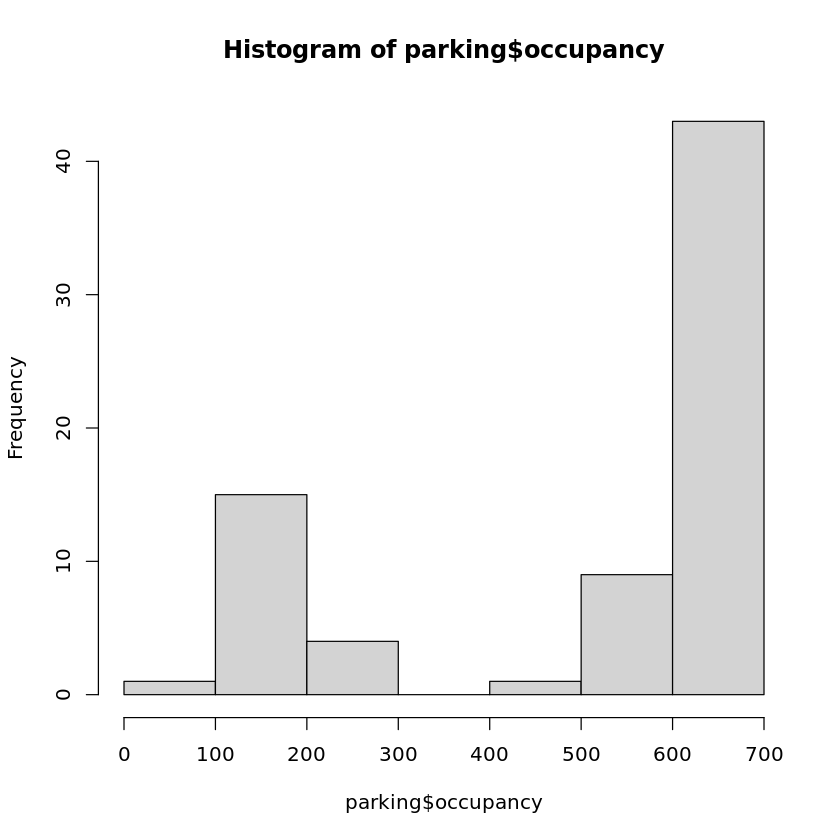

In [2]:
### To obtain the histogram
hist(parking$occupancy)

### To get a two-cluster solution using $k$-means
kmeansSol <- kmeans(parking$occupancy, 2)

## (b) Obtaining the mean silhouette statistic

In Notebook activity B1.3, you plotted the comparative boxplots to examine whether the cluster solution is reasonable. When it comes to comparing cluster solutions, the mean silhouette statistic is more useful. (See Subsection 2.3, Unit B1.) 

### (i)

Using the code cell below, obtain the silhouette statistics for this two-cluster solution, storing the results in an object called `occupancySilhouette`. (Look back at Notebook activity B1.2 if you would like a reminder of how to do this.) Obtain the mean of `occupancySilhouette`.

#### Solution <a class="tocSkip">

Running the code below calculates the silhouette statistics for the two-cluster solution, and saves it in `occupancySilhouette`. It then gives the mean of `occupancySilhouette` as 0.887, to three decimal places.

In [3]:
occupancySilhouette <- silhouette(parking$occupancy, kmeansSol$cluster)
mean(occupancySilhouette)

[1] 0.8872097

### (ii)

Why does the mean silhouette statistic suggest that the two-cluster solution is a very good one?

#### Solution <a class="tocSkip">

This value is close to the maximum value of 1. It suggests that observations in each cluster are generally closer to observations in the same cluster than to observations in the other cluster.

## (c) Comparing with a three-cluster solution

You have seen that for these data, the two-cluster solution is a good one. Could a three-cluster solution be even better?

### (i)

By slightly changing and rerunning the commands you have already used in this notebook activity, obtain the mean silhouette statistic for a three-cluster solution. 

#### Solution <a class="tocSkip">

The required code to obtain the mean silhouette statistic for a three-cluster solution is given below. Running this code gives the mean of `occupancySilhouette` as 0.665, to three decimal places.

In [4]:
kmeansSol <- kmeans(parking$occupancy, 3)
occupancySilhouette <- silhouette(parking$occupancy, kmeansSol$cluster)
mean(occupancySilhouette)

[1] 0.6652791

### (ii)

Is the value you obtained in part (i) higher or lower than the value you obtained for your two-cluster solution? So, which solution is better?

#### Solution <a class="tocSkip">

The mean silhouette statistic for the three-cluster solution is lower. So, the two-cluster solution is the better solution.

### (iii)

Obtain a comparative boxplot of the three-cluster solution.

#### Solution <a class="tocSkip">

Running the code below produces the required comparative boxplot.

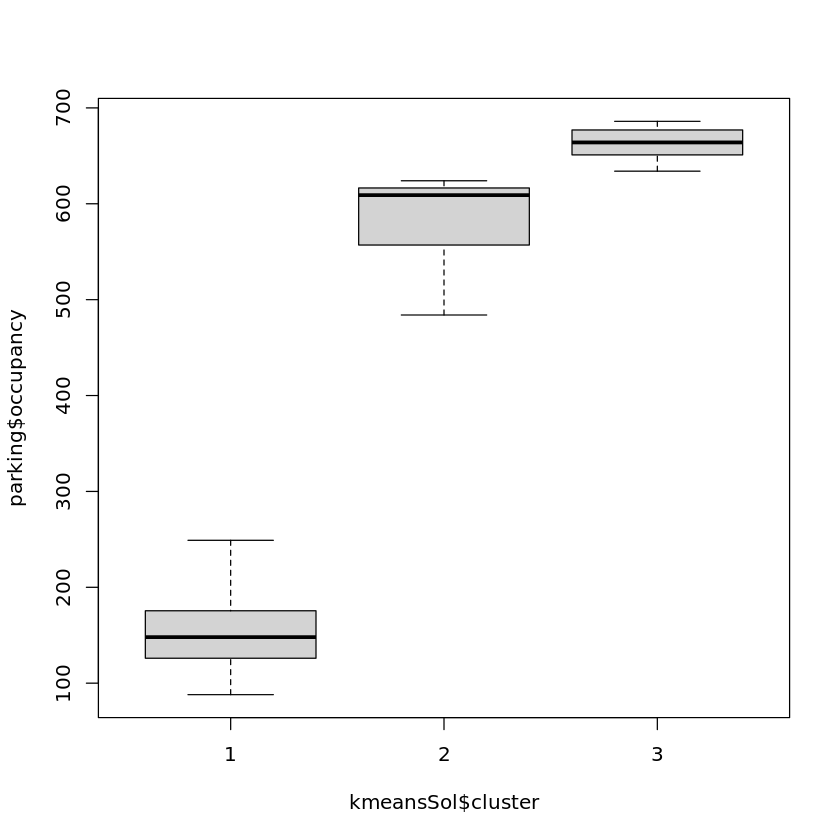

In [5]:
boxplot(parking$occupancy ~ kmeansSol$cluster)

### (iv)

Does the comparative boxplot support the conclusion you drew about the two-cluster and three-cluster solutions based on the mean silhouette statistics? Why or why not?

#### Solution <a class="tocSkip">

From the boxplot, two of three clusters are close. So, observations in these clusters will have lower silhouette statistics. This supports the conclusion we drew about the two-cluster and three-cluster solutions based on the mean silhouette statistics.

## (d) Comparing solutions with different numbers of clusters

So far, we have just considered a two-cluster solution and three-cluster solution. In Example 25 (Subsection 4.5, Unit B1), it is suggested that up to a ten-cluster solution should be tried. 

As you have just seen, it is straightforward to find the mean silhouette statistic for a solution involving a different number of clusters, $k$, by just slightly amending the R commands and re-running them. However, even with copying and pasting of commands, this quickly becomes tedious. Fortunately, there is a way to get R to automatically try different values of $k$ using what is known as a `for` loop. This is where R repeats a block of commands for a set number of times. 

An example of the basic construction of a `for` loop is as follows. 
```
for (j in 2:10){
#  some R commands which include the parameter j
}
``` 
This tells R to run the commands first with $j = 2$, then with $j = 3$, and so on..., finishing with $j = 10$. 

So, to obtain the mean silhouette statistics for cluster solutions obtained using $k$-means with a range of clusters from $2$ to $10$, the following code can be used.
```
for (k in 2:10){
    cat("\n For", k, "clusters \n")
    kmeansSol <- kmeans(parking$occupancy, k)
    occupancySilhouette <- silhouette(parking$occupancy, kmeansSol$cluster)
    print(mean(occupancySilhouette))
}
```
(The commands `cat()` and `print()` are just there to ensure that R displays useful output.)

### (i)

Using the code cell below, generate mean silhouette statistics when the number of clusters ranges from 2 to 10.

#### Solution <a class="tocSkip">

The required mean silhouette statistics are obtained by running the code below.

In [6]:
for (k in 2:10){
    cat("\n For", k, "clusters \n")
    kmeansSol <- kmeans(parking$occupancy, k)
    occupancySilhouette <- silhouette(parking$occupancy, kmeansSol$cluster)
    print(mean(occupancySilhouette))
}


 For 2 clusters 
[1] 0.8872097

 For 3 clusters 
[1] 0.7046022

 For 4 clusters 
[1] 0.7087356

 For 5 clusters 
[1] 0.688005

 For 6 clusters 
[1] 0.6701308

 For 7 clusters 
[1] 0.604881

 For 8 clusters 
[1] 0.6325541

 For 9 clusters 
[1] 0.6416112

 For 10 clusters 
[1] 0.5866869


### (ii)

Based on this, what appears to be the most appropriate number of clusters? Does your answer fit with what is indicated from the histogram you obtained in part (a)(ii)?

#### Solution <a class="tocSkip">

Looking at these results, the average silhouette statistic for the two-cluster solution is much higher than those for solutions involving a higher number of clusters. Thus, it appears there are two clusters in the data. 

This fits with what is indicated from a histogram of the data. The plot indicates that there are two clusters, and not more than two clusters. 

### (iii)

Compare the mean silhouette statistics you obtained with those in Table 15 (Example 26, Subsection 4.5, Unit B1). Are they the same? If they are not, does this mean that a mistake has been made? 

#### Solution <a class="tocSkip">

You probably found that some of the values are different. This does not mean a mistake has been made. Recall that a solution obtained by the algorithm depends on the starting position. By default, the function `kmeans()` selects observations in the given data at random to act as initial centres for the clusters. This can lead to different stable solutions. 